In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers, utils
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sonar.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
df = shuffle(df)
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
26,0.0177,0.0300,0.0288,0.0394,0.0630,0.0526,0.0688,0.0633,0.0624,0.0613,...,0.0102,0.0122,0.0044,0.0075,0.0124,0.0099,0.0057,0.0032,0.0019,R
20,0.0664,0.0575,0.0842,0.0372,0.0458,0.0771,0.0771,0.1130,0.2353,0.1838,...,0.0141,0.0190,0.0043,0.0036,0.0026,0.0024,0.0162,0.0109,0.0079,R
197,0.0238,0.0318,0.0422,0.0399,0.0788,0.0766,0.0881,0.1143,0.1594,0.2048,...,0.0096,0.0071,0.0084,0.0038,0.0026,0.0028,0.0013,0.0035,0.0060,M
86,0.0856,0.0454,0.0382,0.0203,0.0385,0.0534,0.2140,0.3110,0.2837,0.2751,...,0.0172,0.0138,0.0079,0.0037,0.0051,0.0258,0.0102,0.0037,0.0037,R
104,0.0116,0.0179,0.0449,0.1096,0.1913,0.0924,0.0761,0.1092,0.0757,0.1006,...,0.0163,0.0099,0.0084,0.0270,0.0277,0.0097,0.0054,0.0148,0.0092,M


In [4]:
dataset = df.values
print(dataset)

[[0.0177 0.03 0.0288 ... 0.0032 0.0019 'R']
 [0.0664 0.0575 0.0842 ... 0.0109 0.0079 'R']
 [0.0238 0.0318 0.0422 ... 0.0035 0.006 'M']
 ...
 [0.0299 0.0688 0.0992 ... 0.0115 0.0015 'M']
 [0.0025 0.0309 0.0171 ... 0.0028 0.0014 'R']
 [0.0047 0.0059 0.008 ... 0.0002 0.0029 'M']]


In [5]:
dataset.shape

(207, 61)

In [6]:
x = dataset[:,:60].astype('float32')
y = dataset[:,60]
print(x[0])
print(y[0])

[0.0177 0.03   0.0288 0.0394 0.063  0.0526 0.0688 0.0633 0.0624 0.0613
 0.168  0.3476 0.4561 0.5188 0.6308 0.7201 0.5153 0.3818 0.2644 0.3345
 0.4865 0.6628 0.7389 0.9213 1.     0.775  0.5593 0.6172 0.8635 0.6592
 0.477  0.4983 0.333  0.3076 0.2876 0.2226 0.0794 0.0603 0.1049 0.0606
 0.153  0.0983 0.1643 0.1901 0.1107 0.1917 0.1467 0.0392 0.0356 0.027
 0.0168 0.0102 0.0122 0.0044 0.0075 0.0124 0.0099 0.0057 0.0032 0.0019]
R


In [7]:
print(x.shape)
print(y.shape)

(207, 60)
(207,)


In [8]:
le = LabelEncoder()
encoded_y = le.fit_transform(y)
encoded_y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0])

In [9]:
train_data = x[:145,:]
train_labels = encoded_y[:145]
test_data = x[145:,:]
test_labels = encoded_y[145:]
print('Train Data: ',train_data.shape)
print('Test Data: ',test_data.shape)

Train Data:  (145, 60)
Test Data:  (62, 60)


In [10]:
model = models.Sequential()
model.add(layers.Dense(60, activation='relu', input_shape=(60,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [12]:
model.fit(train_data, train_labels, epochs=40, batch_size=2)

Train on 145 samples
Epoch 1/40
145/145 [==============================] - 2s 11ms/sample - loss: 0.6855 - acc: 0.5517
Epoch 2/40
145/145 [==============================] - 1s 5ms/sample - loss: 0.6388 - acc: 0.6897
Epoch 3/40
145/145 [==============================] - 0s 3ms/sample - loss: 0.5985 - acc: 0.7310
Epoch 4/40
145/145 [==============================] - 1s 4ms/sample - loss: 0.5680 - acc: 0.7517
Epoch 5/40
145/145 [==============================] - 1s 4ms/sample - loss: 0.5294 - acc: 0.7931
Epoch 6/40
145/145 [==============================] - 0s 3ms/sample - loss: 0.4968 - acc: 0.8207
Epoch 7/40
145/145 [==============================] - 0s 3ms/sample - loss: 0.4751 - acc: 0.8069
Epoch 8/40
145/145 [==============================] - 0s 3ms/sample - loss: 0.4451 - acc: 0.8276
Epoch 9/40
145/145 [==============================] - 0s 3ms/sample - loss: 0.4422 - acc: 0.8000
Epoch 10/40
145/145 [==============================] - 0s 3ms/sample - loss: 0.4147 - acc: 0.8621
Epoch 1

In [14]:
loss, acc = model.evaluate(test_data, test_labels, verbose=2)
print(acc)

62/1 - 0s - loss: 0.8917 - acc: 0.6452
0.6451613


# Training model with validation

In [15]:
train_data = x[:145,:]
train_labels = encoded_y[:145]
val_data = x[145:166,:]
val_labels = encoded_y[145:166]
test_data = x[166:,:]
test_labels = encoded_y[166:]

In [16]:
print('Train Data: ',train_data.shape)
print('Validation Data: ',val_data.shape)
print('Test Data:', test_data.shape)

Train Data:  (145, 60)
Validation Data:  (21, 60)
Test Data: (41, 60)


In [17]:
model = models.Sequential()
model.add(layers.Dense(60, activation='relu', input_shape=(60,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [18]:
history = model.fit(train_data, train_labels, epochs=20, batch_size=4, validation_data=(val_data,val_labels))

Train on 145 samples, validate on 21 samples
Epoch 1/20
145/145 [==============================] - 1s 9ms/sample - loss: 0.7033 - acc: 0.5379 - val_loss: 0.7105 - val_acc: 0.4762
Epoch 2/20
145/145 [==============================] - 0s 3ms/sample - loss: 0.6303 - acc: 0.6690 - val_loss: 0.6821 - val_acc: 0.5714
Epoch 3/20
145/145 [==============================] - 0s 3ms/sample - loss: 0.5945 - acc: 0.7034 - val_loss: 0.6905 - val_acc: 0.5238
Epoch 4/20
145/145 [==============================] - 1s 4ms/sample - loss: 0.5618 - acc: 0.7172 - val_loss: 0.6736 - val_acc: 0.4762
Epoch 5/20
145/145 [==============================] - 1s 4ms/sample - loss: 0.5359 - acc: 0.7517 - val_loss: 0.6623 - val_acc: 0.5714
Epoch 6/20
145/145 [==============================] - 0s 3ms/sample - loss: 0.5175 - acc: 0.8000 - val_loss: 0.6601 - val_acc: 0.5238
Epoch 7/20
145/145 [==============================] - 1s 4ms/sample - loss: 0.4934 - acc: 0.8000 - val_loss: 0.6519 - val_acc: 0.5238
Epoch 8/20
145/14

In [19]:
his_dict = history.history

In [20]:
loss = his_dict['loss']
val_loss = his_dict['val_loss']
acc = his_dict['acc']
val_acc = his_dict['val_acc']
epochs = range(1,len(loss)+1)

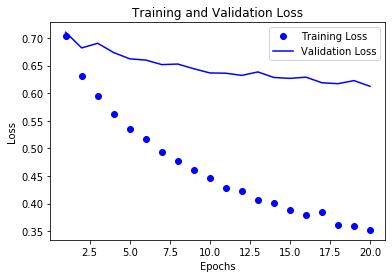

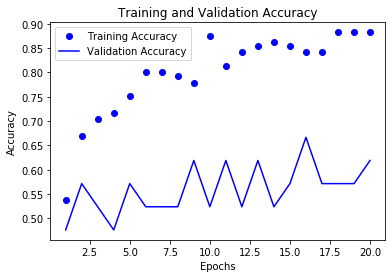

In [21]:
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.clf()

plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [22]:
model.evaluate(test_data, test_labels)

41/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.7253278697409281, 0.5609756]

# Appling k-Fold Validation

In [29]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

In [30]:
seed = 7
np.random.seed(seed)

In [31]:
def model():
    model = models.Sequential()
    model.add(layers.Dense(60, activation='relu', input_shape=(60,)))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['acc'])
    return model

In [33]:
estimator = KerasClassifier(build_fn=model, epochs=100, batch_size=8, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, train_data, train_labels, cv=kfold)

Train on 130 samples
Epoch 1/100
130/130 [==============================] - 1s 10ms/sample - loss: 0.6861 - acc: 0.5538
Epoch 2/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.6519 - acc: 0.5846
Epoch 3/100
130/130 [==============================] - 0s 1ms/sample - loss: 0.6243 - acc: 0.6154
Epoch 4/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.6005 - acc: 0.7615
Epoch 5/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.5789 - acc: 0.7769
Epoch 6/100
130/130 [==============================] - 0s 1ms/sample - loss: 0.5539 - acc: 0.7692
Epoch 7/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.5358 - acc: 0.7769
Epoch 8/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.5183 - acc: 0.8077
Epoch 9/100
130/130 [==============================] - 0s 1ms/sample - loss: 0.5033 - acc: 0.8000
Epoch 10/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.4897 - acc: 0.83

130/130 [==============================] - 0s 2ms/sample - loss: 0.2040 - acc: 0.9462
Epoch 84/100
130/130 [==============================] - 0s 1ms/sample - loss: 0.2017 - acc: 0.9462
Epoch 85/100
130/130 [==============================] - 0s 1ms/sample - loss: 0.2013 - acc: 0.9462
Epoch 86/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2012 - acc: 0.9462
Epoch 87/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.1956 - acc: 0.9538
Epoch 88/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.1961 - acc: 0.9462
Epoch 89/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.1937 - acc: 0.9462
Epoch 90/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.1916 - acc: 0.9385
Epoch 91/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.1926 - acc: 0.9462
Epoch 92/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.1907 - acc: 0.9538
Epoch 93/100
130/130 [=

130/130 [==============================] - 0s 3ms/sample - loss: 0.2359 - acc: 0.9077
Epoch 61/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2365 - acc: 0.9077
Epoch 62/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2280 - acc: 0.9000
Epoch 63/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2313 - acc: 0.9154
Epoch 64/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2280 - acc: 0.9231
Epoch 65/100
130/130 [==============================] - 0s 3ms/sample - loss: 0.2297 - acc: 0.9077
Epoch 66/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2264 - acc: 0.9077
Epoch 67/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2225 - acc: 0.9154
Epoch 68/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2212 - acc: 0.9077
Epoch 69/100
130/130 [==============================] - 0s 4ms/sample - loss: 0.2164 - acc: 0.9231
Epoch 70/100
130/130 [=

130/130 [==============================] - 0s 2ms/sample - loss: 0.3265 - acc: 0.8923
Epoch 37/100
130/130 [==============================] - 0s 3ms/sample - loss: 0.3321 - acc: 0.8769
Epoch 38/100
130/130 [==============================] - 0s 3ms/sample - loss: 0.3387 - acc: 0.8385
Epoch 39/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.3226 - acc: 0.8923
Epoch 40/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.3234 - acc: 0.8615
Epoch 41/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.3221 - acc: 0.8846
Epoch 42/100
130/130 [==============================] - 0s 3ms/sample - loss: 0.3146 - acc: 0.8769
Epoch 43/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.3049 - acc: 0.8923
Epoch 44/100
130/130 [==============================] - 0s 1ms/sample - loss: 0.3077 - acc: 0.9000
Epoch 45/100
130/130 [==============================] - 0s 1ms/sample - loss: 0.3018 - acc: 0.9077
Epoch 46/100
130/130 [=

Epoch 13/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.4952 - acc: 0.8231
Epoch 14/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.4906 - acc: 0.8000
Epoch 15/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.4720 - acc: 0.8077
Epoch 16/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.4639 - acc: 0.8462
Epoch 17/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.4580 - acc: 0.8231
Epoch 18/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.4624 - acc: 0.8154
Epoch 19/100
130/130 [==============================] - 0s 1ms/sample - loss: 0.4368 - acc: 0.8462
Epoch 20/100
130/130 [==============================] - 0s 1ms/sample - loss: 0.4320 - acc: 0.8308
Epoch 21/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.4203 - acc: 0.8615
Epoch 22/100
130/130 [==============================] - 0s 1ms/sample - loss: 0.4132 - acc: 0.8538
Epoch 23/1

130/130 [==============================] - 0s 2ms/sample - loss: 0.2043 - acc: 0.9231
Epoch 95/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.1967 - acc: 0.9308
Epoch 96/100
130/130 [==============================] - 0s 3ms/sample - loss: 0.1969 - acc: 0.9538
Epoch 97/100
130/130 [==============================] - 0s 3ms/sample - loss: 0.1905 - acc: 0.9385
Epoch 98/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.1966 - acc: 0.9231
Epoch 99/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.1998 - acc: 0.9385
Epoch 100/100
15/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================

130/130 [==============================] - 0s 3ms/sample - loss: 0.2513 - acc: 0.9308
Epoch 71/100
130/130 [==============================] - 0s 3ms/sample - loss: 0.2462 - acc: 0.9308
Epoch 72/100
130/130 [==============================] - 0s 3ms/sample - loss: 0.2481 - acc: 0.9308
Epoch 73/100
130/130 [==============================] - 0s 3ms/sample - loss: 0.2446 - acc: 0.9154
Epoch 74/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2444 - acc: 0.9154 0s - loss: 0.1609 - acc: 0.
Epoch 75/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2378 - acc: 0.9308
Epoch 76/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2422 - acc: 0.9077
Epoch 77/100
130/130 [==============================] - 0s 1ms/sample - loss: 0.2422 - acc: 0.9231
Epoch 78/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2365 - acc: 0.9231
Epoch 79/100
130/130 [==============================] - 0s 2ms/sample - loss: 0.2424 - acc: 0.

131/131 [==============================] - 0s 4ms/sample - loss: 0.2981 - acc: 0.9160
Epoch 48/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.2913 - acc: 0.8931
Epoch 49/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.2917 - acc: 0.9008
Epoch 50/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.2912 - acc: 0.9237
Epoch 51/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.2926 - acc: 0.9084
Epoch 52/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.2850 - acc: 0.8931
Epoch 53/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.2818 - acc: 0.9084
Epoch 54/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.2843 - acc: 0.8855
Epoch 55/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.2782 - acc: 0.9008
Epoch 56/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.2745 - acc: 0.9008
Epoch 57/100
131/131 [=

131/131 [==============================] - 0s 1ms/sample - loss: 0.3623 - acc: 0.8702
Epoch 24/100
131/131 [==============================] - 0s 938us/sample - loss: 0.3596 - acc: 0.8626
Epoch 25/100
131/131 [==============================] - 0s 519us/sample - loss: 0.3551 - acc: 0.8779
Epoch 26/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.3514 - acc: 0.8626
Epoch 27/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.3437 - acc: 0.8931
Epoch 28/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.3411 - acc: 0.9008
Epoch 29/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.3332 - acc: 0.8931
Epoch 30/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.3339 - acc: 0.8779
Epoch 31/100
131/131 [==============================] - 0s 3ms/sample - loss: 0.3288 - acc: 0.8779
Epoch 32/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.3226 - acc: 0.8779
Epoch 33/100
131/13

Train on 131 samples
Epoch 1/100
131/131 [==============================] - 1s 7ms/sample - loss: 0.7034 - acc: 0.5191
Epoch 2/100
131/131 [==============================] - 0s 816us/sample - loss: 0.6682 - acc: 0.5802
Epoch 3/100
131/131 [==============================] - 0s 840us/sample - loss: 0.6477 - acc: 0.6947
Epoch 4/100
131/131 [==============================] - 0s 748us/sample - loss: 0.6304 - acc: 0.7023
Epoch 5/100
131/131 [==============================] - 0s 648us/sample - loss: 0.6151 - acc: 0.7252
Epoch 6/100
131/131 [==============================] - 0s 699us/sample - loss: 0.5963 - acc: 0.7328
Epoch 7/100
131/131 [==============================] - 0s 741us/sample - loss: 0.5795 - acc: 0.7557
Epoch 8/100
131/131 [==============================] - 0s 741us/sample - loss: 0.5630 - acc: 0.7634
Epoch 9/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.5474 - acc: 0.7557
Epoch 10/100
131/131 [==============================] - 0s 783us/sample - loss: 0.5

131/131 [==============================] - 0s 3ms/sample - loss: 0.1998 - acc: 0.9389
Epoch 83/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.1935 - acc: 0.9313
Epoch 84/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.1922 - acc: 0.9313
Epoch 85/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.1992 - acc: 0.9466
Epoch 86/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.1908 - acc: 0.9237
Epoch 87/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.1873 - acc: 0.9542
Epoch 88/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.1842 - acc: 0.9466
Epoch 89/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.1857 - acc: 0.9618
Epoch 90/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.1841 - acc: 0.9542
Epoch 91/100
131/131 [==============================] - 0s 3ms/sample - loss: 0.1805 - acc: 0.9618
Epoch 92/100
131/131 [=

131/131 [==============================] - 0s 2ms/sample - loss: 0.2657 - acc: 0.9008
Epoch 60/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.2687 - acc: 0.9084
Epoch 61/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.2575 - acc: 0.9008
Epoch 62/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.2581 - acc: 0.8855
Epoch 63/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.2528 - acc: 0.9237
Epoch 64/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.2585 - acc: 0.9008
Epoch 65/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.2469 - acc: 0.9160
Epoch 66/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.2464 - acc: 0.9008
Epoch 67/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.2436 - acc: 0.9008
Epoch 68/100
131/131 [==============================] - 0s 3ms/sample - loss: 0.2439 - acc: 0.9084
Epoch 69/100
131/131 [=

131/131 [==============================] - 0s 2ms/sample - loss: 0.3226 - acc: 0.9008
Epoch 36/100
131/131 [==============================] - 0s 905us/sample - loss: 0.3119 - acc: 0.8931
Epoch 37/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.3121 - acc: 0.8931
Epoch 38/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.3072 - acc: 0.8855
Epoch 39/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.3086 - acc: 0.9008
Epoch 40/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.3067 - acc: 0.9084
Epoch 41/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.3068 - acc: 0.8931
Epoch 42/100
131/131 [==============================] - 0s 2ms/sample - loss: 0.3059 - acc: 0.8855
Epoch 43/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.2952 - acc: 0.8931
Epoch 44/100
131/131 [==============================] - 0s 1ms/sample - loss: 0.2940 - acc: 0.9084
Epoch 45/100
131/131 

In [34]:
print("Results(Accuracy): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results(Accuracy): 83.48% (6.17%)


In [35]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, train_data, train_labels, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 89.71% (6.89%)
